# Part 1 - a

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sea

# Define the probability density function f(x)
def f(x): 
    return 1/2 * np.exp(-np.abs(x))

In [3]:
# Metropolis-Hastings algorithm
def metropolis_hastings(N, s, x0):
    samples = [x0]  #initial value
    x_prev = x0  #set the previous sample to the initial value
    
    for i in range(1, N):
        x = np.random.normal(x_prev, s)
        
        #compute the ratio 
        #r = f(x) / f(x_prev)
        log_r = np.log(f(x)) - np.log(f(x_prev))
        log_u = np.log(np.random.uniform(0, 1))
        
        if log_u < log_r:
            samples.append(x)
            x_prev = x
        
        else: 
            samples.append(x_prev)
            
    return np.array(samples)

# Parameters
N = 10000
s = 1 
x0 = 1 #initial value

# Generate samples
samples = metropolis_hastings(N, s, x0)   



In [4]:
len(samples)

10000

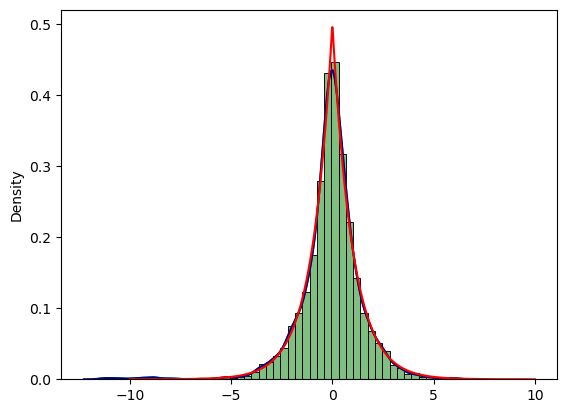

In [5]:
# Plot histogram and kernel density plot
sea.histplot(samples, kde=True, bins=50,color='green', stat='density')
sea.kdeplot(samples, color='darkblue')
x = np.linspace(-10, 10, 1000)
plt.plot(x, f(x), color='red')
plt.show()

In [6]:
# Calculate sample mean and standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standrad Deviation: {sample_std}")

Sample Mean: -0.07422303730615656
Sample Standrad Deviation: 1.5384822872689237


# part 1 - b

In [44]:
N = 2000
s_values = np.linspace(0.001, 1, 250)
J = 4

def compute_R(N, s, J):
    chains = [metropolis_hastings(N, s, np.random.uniform(0, 1)) for _ in range(J)]
    Mj = np.mean(chains, axis=1)
    Vj = np.var(chains, axis=1, ddof=1)
    W = np.mean(Vj)
    M = np.mean(Mj)
    B = N / (J - 1) * np.sum((Mj - M)**2)
    R = np.sqrt((W + B) / W)
    return R

In [45]:
R_values = [compute_R(N, s, J) for s in s_values]


In [46]:
print(R_values)

[369.2231368265903, 166.62876813572245, 76.24466924557792, 92.61810422140607, 97.15905786811702, 18.588179141758662, 65.29022552288669, 46.83826884908901, 57.302265334607746, 66.62922759254296, 95.48145671080911, 34.97230677387421, 18.970999133527098, 26.773726582075323, 55.99770666594821, 15.183604044188735, 16.651703494177948, 35.94957456736211, 10.058902425819932, 23.074066240299672, 25.251703213126948, 31.22834082713243, 24.658134264152697, 18.723808206816685, 34.65017652707605, 47.493594846340756, 24.051833055273313, 24.64761149138576, 15.25733064893028, 11.327353940115476, 31.576160474299744, 11.264888820733676, 14.356890723260198, 17.99184971214689, 12.037312320703244, 14.8922611363729, 11.71058207626535, 12.516802237143242, 21.104679993865012, 28.70254277219301, 22.2513926738117, 10.59975651707058, 20.16048896366749, 17.218593315187842, 20.70666403385971, 12.5533837685396, 13.567848684352382, 22.182008297394272, 17.419233233740854, 8.136979023672993, 16.508998173938554, 9.22886

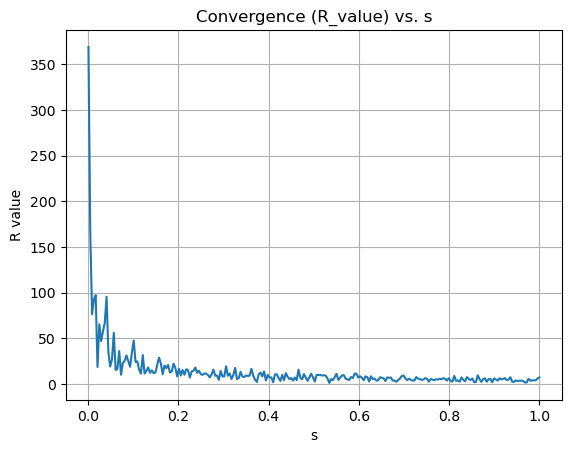

In [47]:
plt.plot(s_values, R_values)
plt.xlabel('s')
plt.ylabel('R value')
plt.title('Convergence (R_value) vs. s')
plt.grid(True)
plt.show()